## Recursive Piecewise Polynomial Filter with Sliding Least Square Technique   
This program uses the recursive algorithm (could be directly implemented in FPGA)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

Initialize the variables:
 *** 
* constant offset is baseline
* amp is signal amplitude
* noise_amp is amplitude of electronic noise
* tau is decay constant of the exponential signal
* length is the length of the waveform
* rise_time is the time given to DTF to rise
* flat_top is the time given to DFT to remain flat at the top and at the bottom

In [2]:
baseline=0.
amp=25
noise_amp=0.
tau=500
length=7000
rise_time=400
flat_top=500

Lets define a exponential function

In [3]:
x=np.arange(-3500,3500,1)
def expo(amp, x, tau):
    y=[0]*len(x)#x*0
    for i in range (1, len(x)): 
        if (x[i] > 0):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

Lets make a numpy array for the noise and constant offset (named as baseline)

In [4]:
N=[0.]*7000
N=np.array(N)
for i in range (0,7000):
    N[i]=random.uniform(-1,1)
N=N*noise_amp
#now baseline offset
baseline_c=[baseline]*7000
baseline_c=np.array(baseline_c)
A = baseline_c+expo(amp, x, tau)
A=np.array(A)
#Hence the total signal
T=A+N

Plot of input signal with constant offset and noise

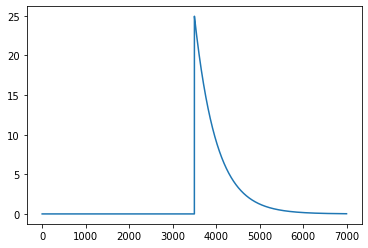

In [5]:
plt.plot(T)

Impulse response

In [6]:
sig=T
sig=np.array(sig)
r_0=[0]*7000
r_1=[0]*7000
r_2=[0]*7000
r_3=[0]*7000
for i in range (3500, 3601):
    if i>2:
        r_0[i]=T[i]
        r_1[i]=r_1[i-1]+T[i]
        r_2[i]=r_2[i-1]+r_1[i]
        r_3[i]=r_3[i-1]+r_2[i]

In [17]:
v_n=T
L=100
delay=100
v_n=np.array(v_n)
r_0_L=[0]*7000
r_1_L=[0]*7000
r_2_L=[0]*7000
r_3_L=[0]*7000

A_0_L=[0]*7000
A_1_L=[0]*7000
A_2_L=[0]*7000
A_3_L=[0]*7000
A_4_L=[0]*7000
A_5_L=[0]*7000
A_6_L=[0]*7000
A_7_L=[0]*7000

r_t=[0]*7000
wave_r=[0]*7000
wave_c_r=[0]*7000
c_0=100
for i in range (1, 7000):
    if i>100:
        #1st one
        A_0_L[i]=A_0_L[i-1]+v_n[i] #accumulaor
        wave_r[i]=v_n[i]+c_0*A_0_L[i]
        wave_c_r[i] = wave_c_r[i-1]+wave_r[i]
        
        A_1_L[i]=A_1_L[i-1]+A_0_L[i]
        A_2_L[i]=A_2_L[i-1]+A_1_L[i-1]
        A_3_L[i]=A_3_L[i-1]+A_2_L[i-1]
        A_4_L[i]=A_4_L[i-1]+A_3_L[i-1]
        A_5_L[i]=A_5_L[i-1]+A_4_L[i-1]
        A_6_L[i]=A_6_L[i-1]+A_5_L[i-1]
        A_7_L[i]=A_7_L[i-1]+A_6_L[i-1]
        
        #lets try delays
        wave_r[i]=wave_c_r[i]-wave_c_r[i-delay]-wave_c_r[i-2*delay]+wave_c_r[i-3*delay]
for i in range(0, length):
    wave_r[i] = wave_r[i]/100      
        

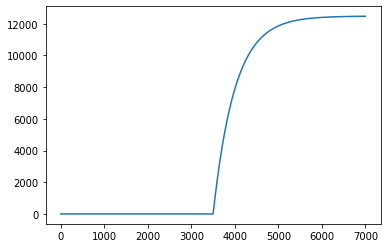

In [19]:
plt.plot(A_0_L)
#plt.plot(v_n)